<a href="https://colab.research.google.com/github/anildevireddy/AnilAIML/blob/master/Bank_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.4.0

     |████████████████████████████████| 394.7MB 37kB/s 
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
project_path = '/content/drive/My Drive/Colab Notebooks/'

In [11]:
dataset_file = project_path + 'bank.csv'

In [155]:
data = pd.read_csv(dataset_file)

In [156]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [157]:
data.shape

(10000, 14)

RowNumber and CustomerID columns, which can be eliminated as they are unique. No use of Surname as it can't be used as input

In [158]:
cols_to_consider=['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']

In [159]:
subset=data[cols_to_consider]  #Selecting only the above columns 

In [160]:
subset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [103]:
#geography=pd.get_dummies(subset["Geography"])
#geography

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [104]:
#gender=pd.get_dummies(subset["Gender"])
#gender

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [161]:
gender = {'Male': 1,'Female': 2}
subset.Gender = [gender[item] for item in subset.Gender]

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [163]:
geography = {'France': 1,'Spain': 2,'Germany': 3}
subset.Geography = [geography[item] for item in subset.Geography] 

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [164]:
#subset=pd.concat([subset,geography,gender],axis=1)
#subset=subset.drop(['Geography','Gender'],axis=1)
subset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,2,42,2,0.00,1,1,1,101348.88,1
1,608,2,2,41,1,83807.86,1,0,1,112542.58,0
2,502,1,2,42,8,159660.80,3,1,0,113931.57,1
3,699,1,2,39,1,0.00,2,0,0,93826.63,0
4,850,2,2,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,2,36,7,0.00,1,0,1,42085.58,1
9998,772,3,1,42,3,75075.31,2,1,0,92888.52,1


In [165]:
subset.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,1.749500,1.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.830433,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,1.000000,1.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,1.000000,1.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,1.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,3.000000,2.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,3.000000,2.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


The Max values of Balance and Estimated Salary columns are very larger compared to other columns. Lets scale the data.

In [166]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [167]:
subset_scaled=scaler.fit_transform(subset)   

In [168]:
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)   #Creating a dataframe of the above results

In [169]:
import seaborn as sns 
import matplotlib.pyplot as plt

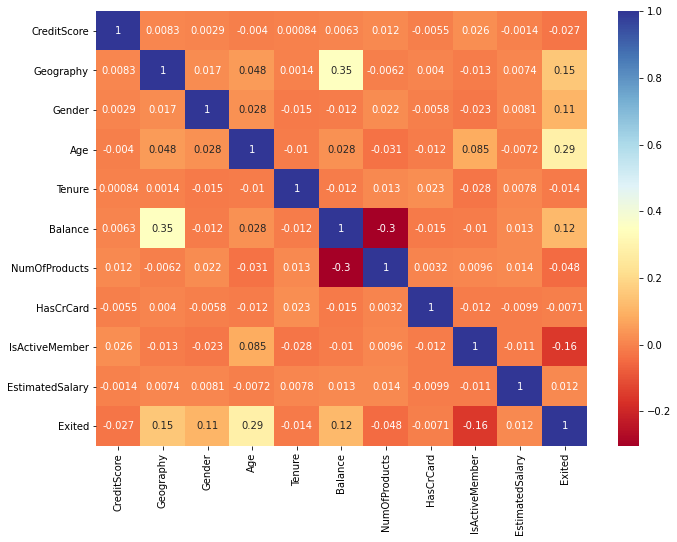

In [170]:
plt.subplots(figsize=(11,8))
sns.heatmap(subset_scaled_df.corr(), annot=True, cmap="RdYlBu")
plt.show()

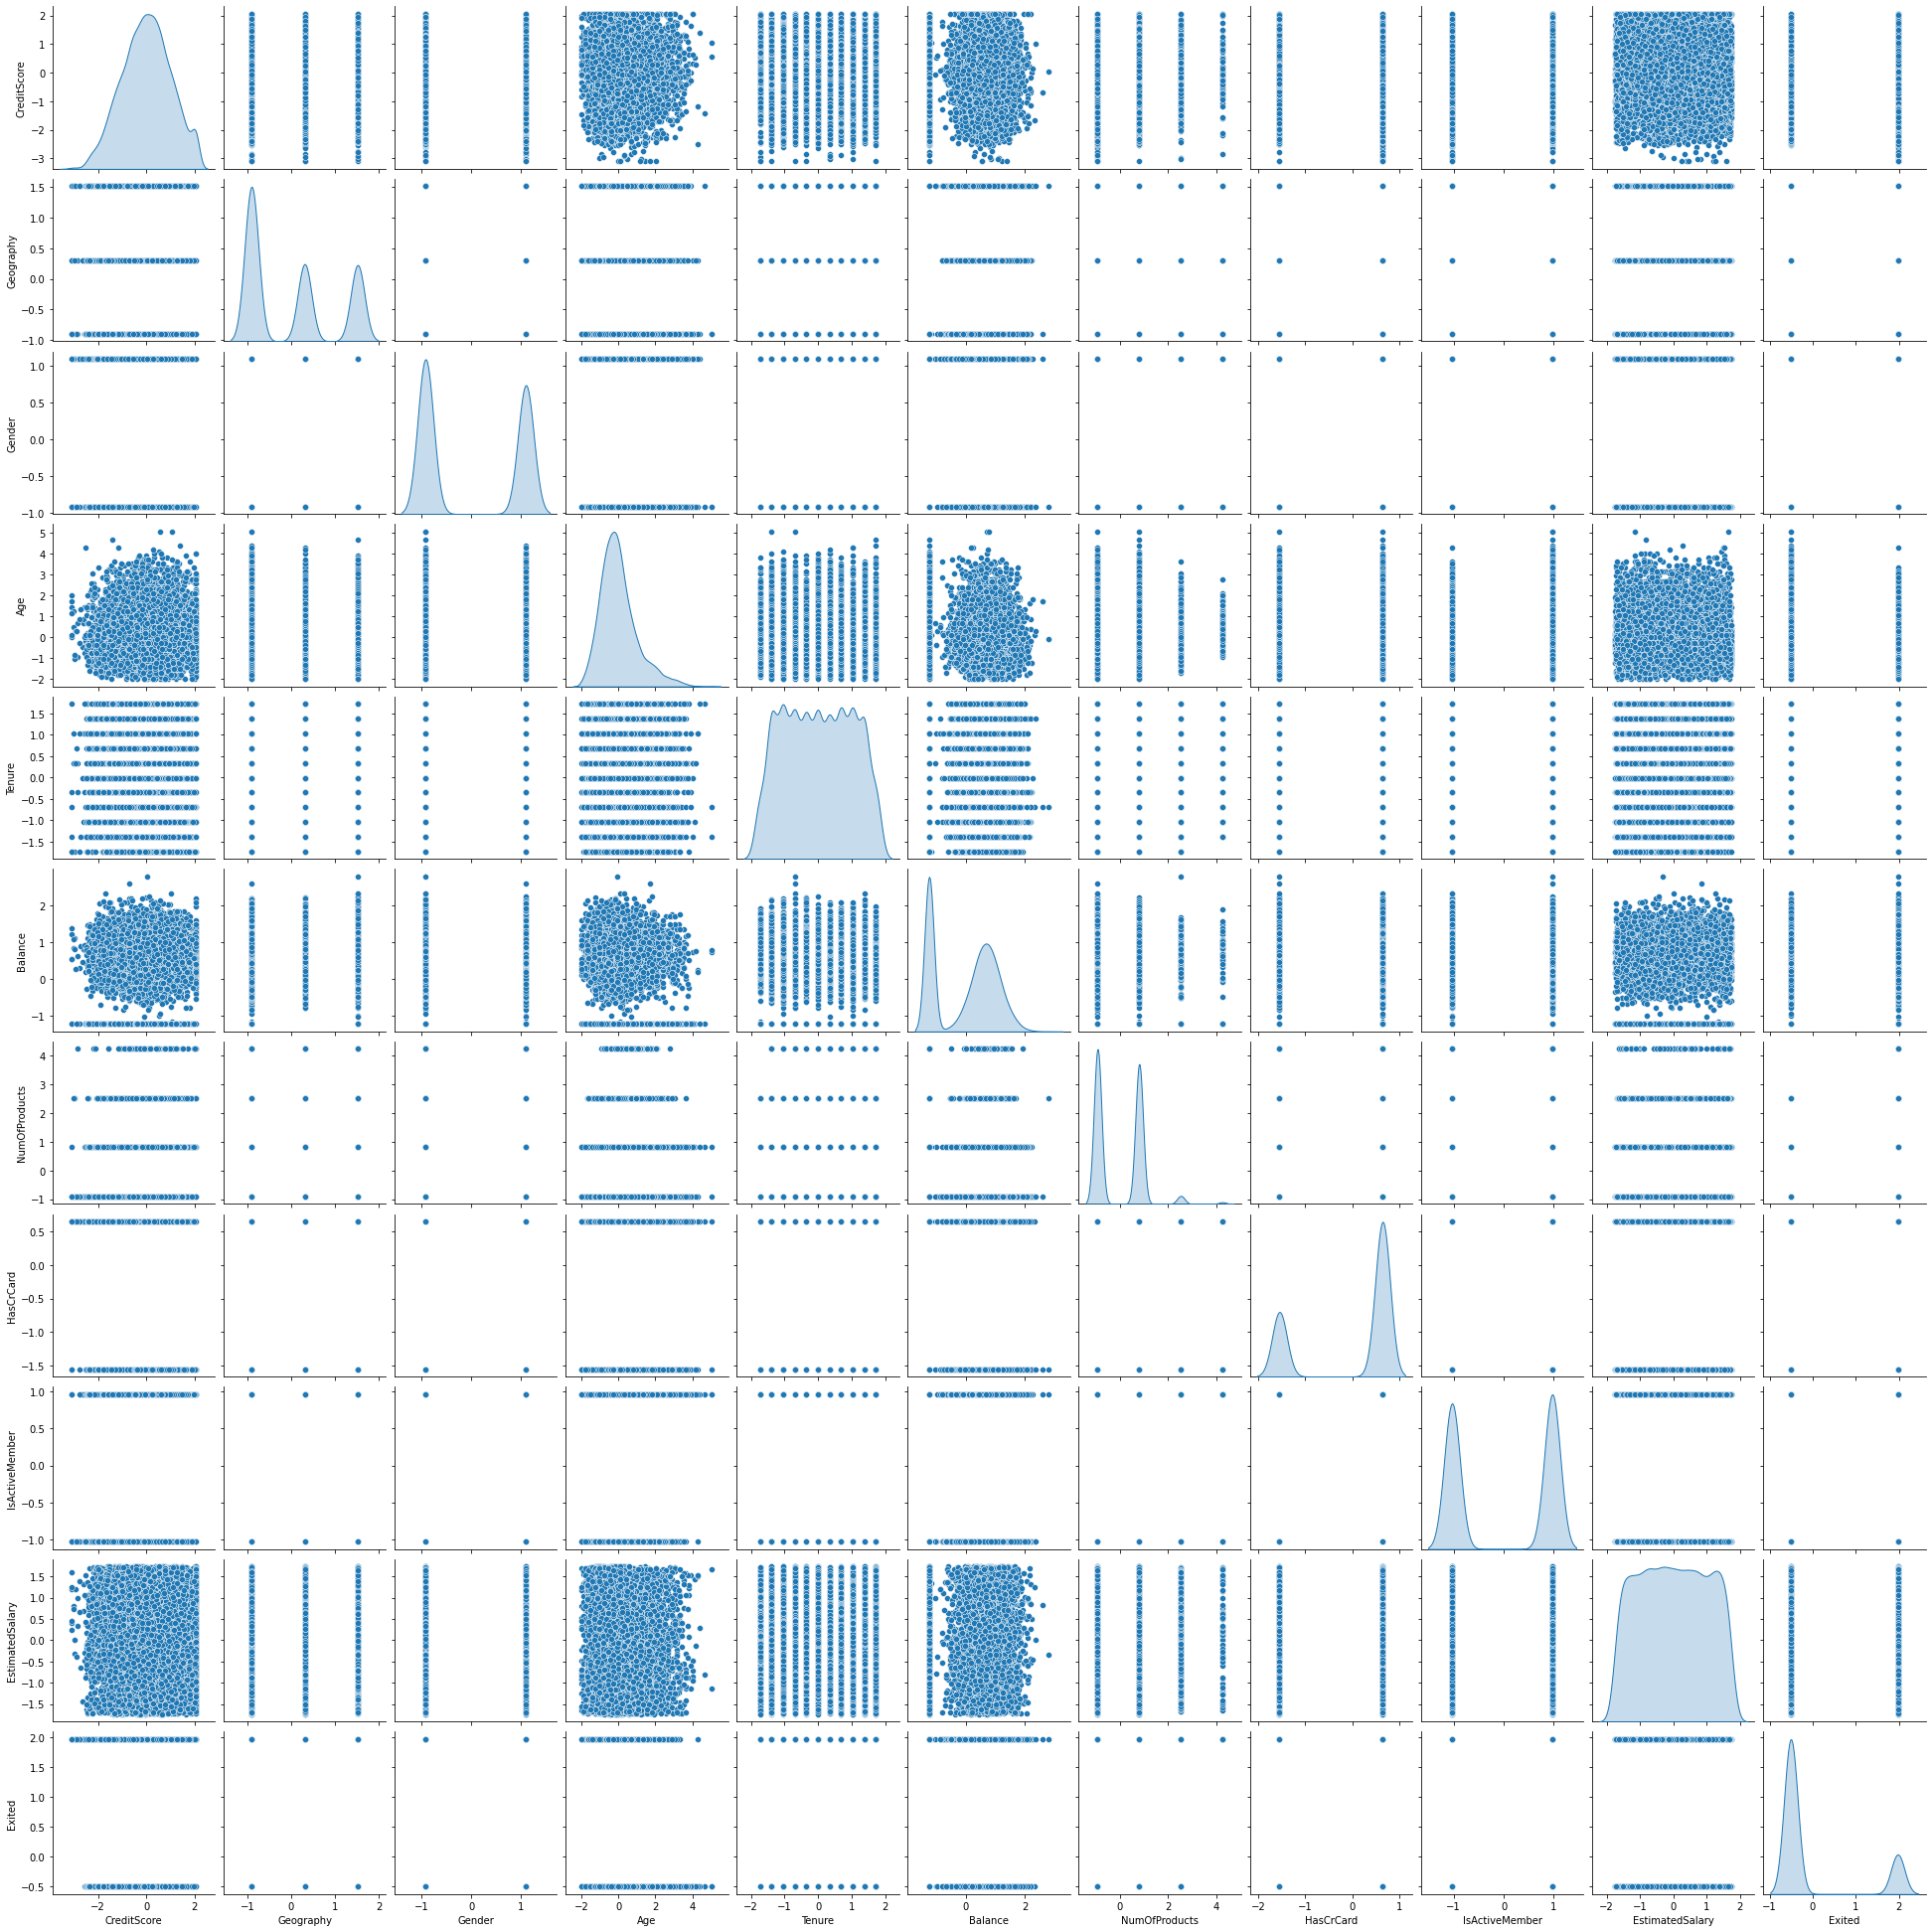

In [58]:
sns.pairplot(subset_scaled_df,diag_kind="kde")

In [187]:
X_data = subset.iloc[:, :-1]

In [188]:
X_data.shape

(10000, 10)

In [189]:
X_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1,2,42,2,0.00,1,1,1,101348.88
1,608,2,2,41,1,83807.86,1,0,1,112542.58
2,502,1,2,42,8,159660.80,3,1,0,113931.57
3,699,1,2,39,1,0.00,2,0,0,93826.63
4,850,2,2,43,2,125510.82,1,1,1,79084.10


In [203]:
y_data = subset.iloc[:, 10]

In [204]:
y_data.shape

(10000,)

In [205]:
y_data.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [234]:
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8000, 10) (2000, 10) (8000,) (2000,)


In [235]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [236]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000,)
(2000,)


In [237]:
nn_classifier  = Sequential()

In [238]:
#Activation functions
nn_classifier .add(Dense(32, activation = 'relu', input_dim = 10))
nn_classifier .add(Dense(16, activation = 'tanh'))
nn_classifier .add(Dense(1, activation = 'sigmoid'))

In [239]:
nn_classifier.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

In [240]:
#Forward and Backward propagation
model=nn_classifier.fit(x_train, y_train ,validation_split=0.33, batch_size = 10, epochs = 20, verbose = 1)

Epoch 1/20
536/536 [==============================] - 2s 2ms/step - loss: 0.4310 - accuracy: 0.8167 - val_loss: 0.3932 - val_accuracy: 0.8323
Epoch 2/20
536/536 [==============================] - 1s 2ms/step - loss: 0.3741 - accuracy: 0.8443 - val_loss: 0.3766 - val_accuracy: 0.8402
Epoch 3/20
536/536 [==============================] - 1s 2ms/step - loss: 0.3492 - accuracy: 0.8577 - val_loss: 0.3676 - val_accuracy: 0.8463
Epoch 4/20
536/536 [==============================] - 1s 2ms/step - loss: 0.3546 - accuracy: 0.8571 - val_loss: 0.3659 - val_accuracy: 0.8474
Epoch 5/20
536/536 [==============================] - 1s 2ms/step - loss: 0.3270 - accuracy: 0.8641 - val_loss: 0.3646 - val_accuracy: 0.8463
Epoch 6/20
536/536 [==============================] - 1s 2ms/step - loss: 0.3332 - accuracy: 0.8688 - val_loss: 0.3606 - val_accuracy: 0.8493
Epoch 7/20
536/536 [==============================] - 1s 2ms/step - loss: 0.3451 - accuracy: 0.8563 - val_loss: 0.3629 - val_accuracy: 0.8489
Epoch 

In [255]:
x_test = preprocessing.normalize(x_test)

In [256]:
results = nn_classifier.evaluate(x_test, y_test.values)

63/63 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.8030


In [258]:
print(nn_classifier.metrics_names)
print(results)    

['loss', 'accuracy']
[0.42789730429649353, 0.8029999732971191]


In [261]:
Y_pred_cls = nn_classifier.predict_classes(x_test, batch_size=200, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(nn_classifier.evaluate(x_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test.values, Y_pred_cls)

63/63 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.8030


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy Model1 (Dropout): 0.8029999732971191
Recall_score: 0.02962962962962963
Precision_score: 0.9230769230769231
F-score: 0.05741626794258373


array([[1594,    1],
       [ 393,   12]])